# Exercice 1
## Propriétés de transformation FFT dans les images réelles

Appliquez les propriétés de la transformation FFT aux deux images (house.tif et woman_blonde.tif) Vous trouverez <a href="https://drive.google.com/file/d/1lbwm5ytl0nvqh5xa-f-eow1qui2mlqwo"> ici </a> et en utilisant l'équation (3), visualisez ce qui suit:

> a) Les images originales

> b) angle de phase et spectre de ces images

> (c) Reconstruction des images originales en utilisant la FFT inverse, en utilisant la FFT inverse seule de leur partie réelle et en utilisant la FFT inverse seule de la partie fantastique de

> d) Reconstruction des images originales en utilisant uniquement le spectre

> e) Reconstruction d'images originales en utilisant la phase d'angle

> f) Reconstruction d'une nouvelle image en utilisant le spectre de l'un et la phase de l'autre à partir des images originales

Importer des fonctions et des bibliothèques

In [24]:
# Import functions and libraries
import numpy as np
from numpy import r_
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy import ndimage
from skimage import color, img_as_float, data
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray



Afficher les images originales et leur vérification de dimension (pour avoir la même dimension)

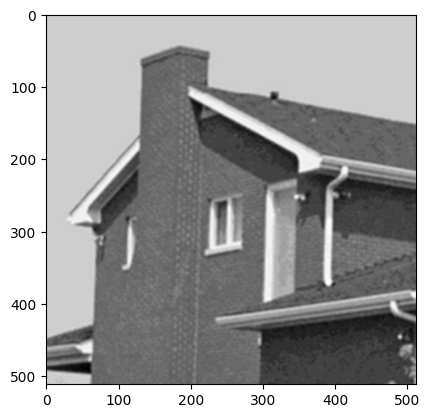

(512, 512) 512 512


In [25]:
image1 = color.rgb2gray(plt.imread('image/house.tif')[:,:,0:3])

# Display
plt.imshow(image1,cmap="gray")
plt.show()

# Calculation of image sizes
imsize1 = image1.shape
height1 = image1.shape[0]
width1 = image1.shape[1]

print(imsize1,height1,width1)

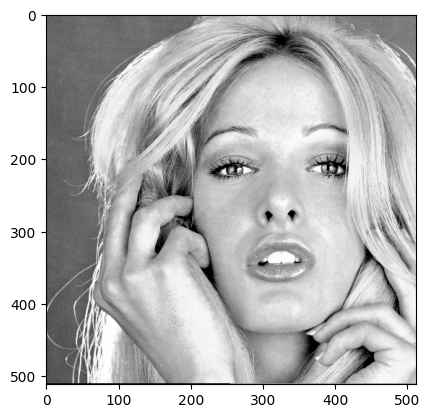

(512, 512) 512 512


array([[0]], dtype=uint8)

In [26]:
image2 = plt.imread('image/woman_blonde.tif')

# Display
plt.imshow(image2,cmap="gray")
plt.show()

# Calculation of image sizes
imsize2 = image2.shape
height2 = image2.shape[0]
width2 = image2.shape[1]

print(imsize2,height2,width2)

image2[:1,:1]

FFT2 s'applique à l'image entière (pour les deux images)

... continuité ...

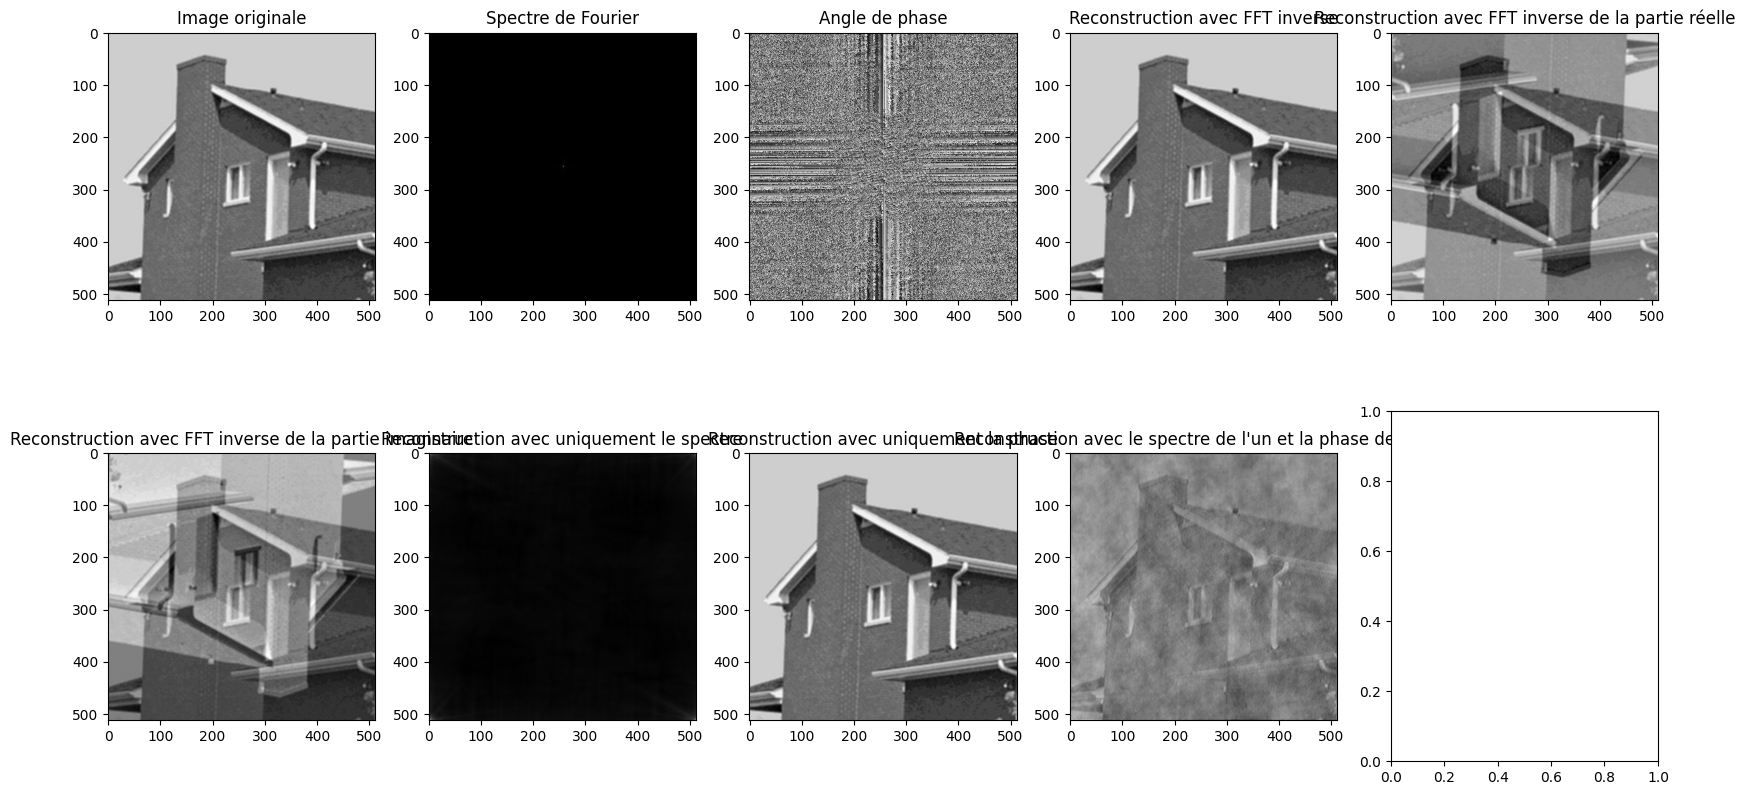

In [35]:
# Import functions and libraries
import numpy as np
from numpy import r_
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy import ndimage
from skimage import data, img_as_float
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray

image1 = color.rgb2gray(plt.imread('image/house.tif')[:,:,0:3])
f1, (ax) = plt.subplots(2, 5, figsize=(20, 10))

# A 
# Affichage de l'image originale
ax[0,0].imshow(image1, cmap='gray')
ax[0,0].set_title('Image originale')

# Transformation de Fourier 2D
F1 = fftshift(fft2(image1))

# Module et phase de la transformation de Fourier
F1_module = np.abs(F1)
F1_phase = np.angle(F1)

# B
# Affichage de l'angle de phase et du spectre
ax[0,1].imshow(F1_module, cmap='gray')
ax[0,1].set_title('Spectre de Fourier')

ax[0,2].imshow(F1_phase, cmap='gray')
ax[0,2].set_title('Angle de phase')

# Reconstruction des images originales en utilisant la FFT inverse
image1_reconstructed = abs(ifft2(ifftshift(F1)))

ax[0,3].imshow(image1_reconstructed, cmap='gray')
ax[0,3].set_title('Reconstruction avec FFT inverse')

# Reconstruction des images originales en utilisant la FFT inverse seule de leur partie réelle
image1_reconstructed_real = ifft2(ifftshift(np.real(F1))).real

ax[0,4].imshow(image1_reconstructed_real, cmap='gray')
ax[0,4].set_title('Reconstruction avec FFT inverse de la partie réelle')

# Reconstruction des images originales en utilisant la FFT inverse seule de la partie imaginaire de F1
image1_reconstructed_imag = ifft2(ifftshift(np.imag(F1) * 1j)).real

ax[1,0].imshow(image1_reconstructed_imag, cmap='gray')
ax[1,0].set_title('Reconstruction avec FFT inverse de la partie imaginaire')

# D
# Reconstruction des images originales en utilisant uniquement le spectre
image1_reconstructed_spectre = ifft2(ifftshift(np.abs(F1) * np.exp(1j * 0))).real

ax[1,1].imshow(image1_reconstructed_spectre, cmap='gray')
ax[1,1].set_title('Reconstruction avec uniquement le spectre')

# E
# Reconstruction des images originales en utilisant uniquement la phase d'angle
image1_reconstructed_phase = ifft2(ifftshift(np.abs(F1) * np.exp(1j * F1_phase))).real

ax[1,2].imshow(image1_reconstructed_phase, cmap='gray')
ax[1,2].set_title('Reconstruction avec uniquement la phase')

# F
# Reconstruction d'une nouvelle image en utilisant le spectre de l'un et la phase de l'autre
image2 = plt.imread('image/woman_blonde.tif')
F2 = fftshift(fft2(image2))
image_reconstructed_mixed = ifft2(ifftshift(np.abs(F2) * np.exp(1j * np.angle(F1)))).real

ax[1,3].imshow(image_reconstructed_mixed, cmap='gray')
ax[1,3].set_title('Reconstruction avec le spectre de l\'un et la phase de l\'autre')


plt.show()


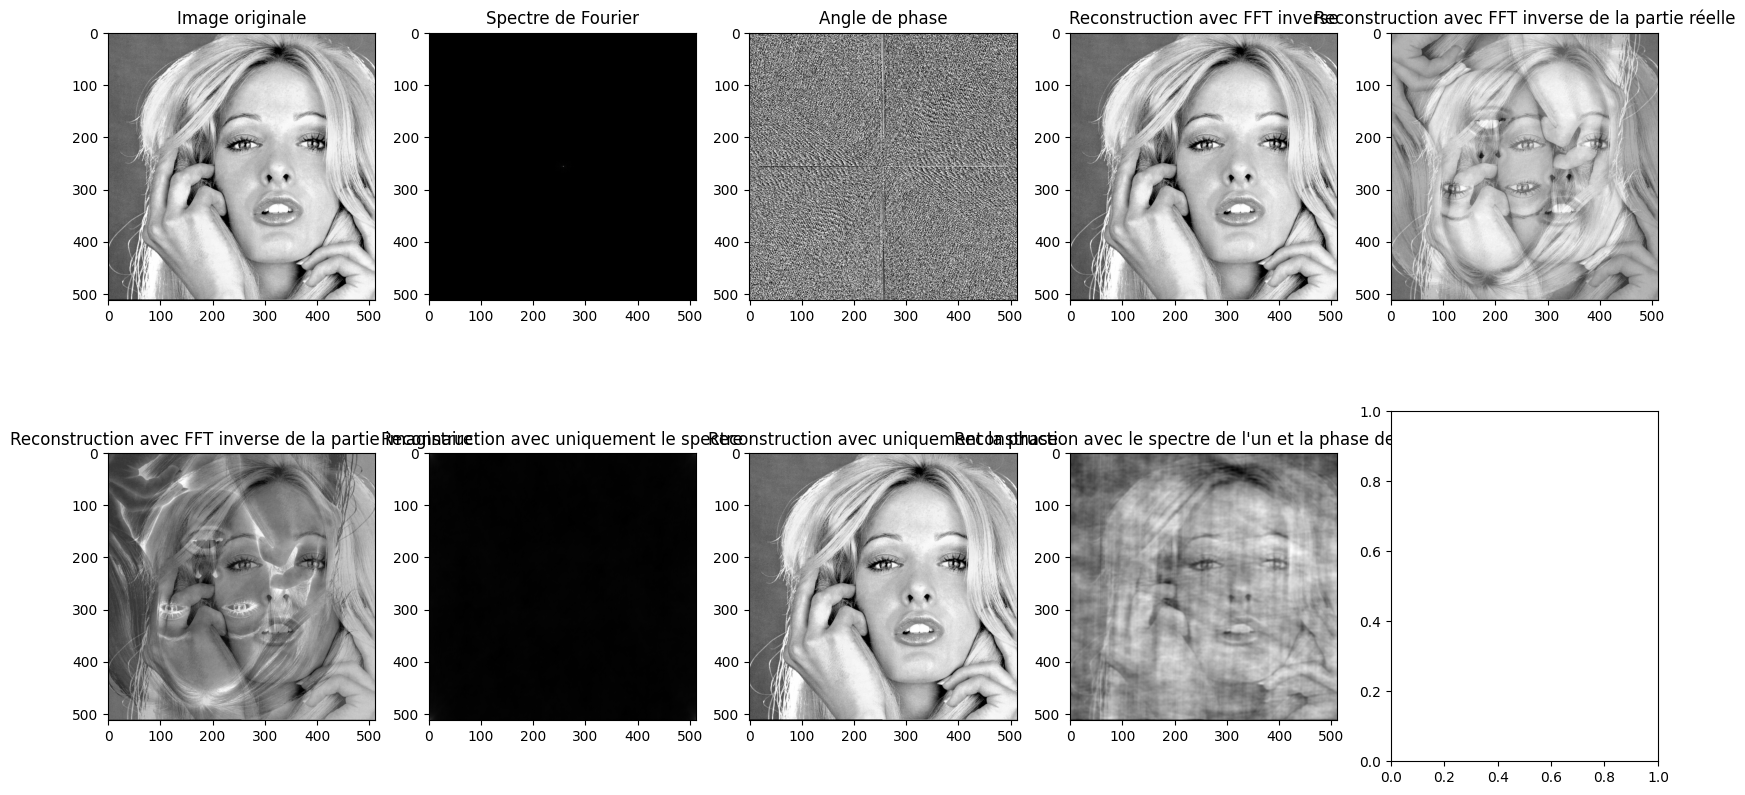

In [36]:
# Import functions and libraries
import numpy as np
from numpy import r_
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy import ndimage
from skimage import data, img_as_float
from scipy.fftpack import fft2,fftshift,ifftshift, ifft2
from skimage.io import imread, imshow, show
from skimage.color import rgb2gray

image1 = plt.imread('image/woman_blonde.tif')
f1, (ax) = plt.subplots(2, 5, figsize=(20, 10))

# A 
# Affichage de l'image originale
ax[0,0].imshow(image1, cmap='gray')
ax[0,0].set_title('Image originale')

# Transformation de Fourier 2D
F1 = fftshift(fft2(image1))

# Module et phase de la transformation de Fourier
F1_module = np.abs(F1)
F1_phase = np.angle(F1)

# B
# Affichage de l'angle de phase et du spectre
ax[0,1].imshow(F1_module, cmap=cm.gray)
ax[0,1].set_title('Spectre de Fourier')

ax[0,2].imshow(F1_phase, cmap=cm.gray)
ax[0,2].set_title('Angle de phase')

# Reconstruction des images originales en utilisant la FFT inverse
image1_reconstructed = abs(ifft2(ifftshift(F1)))

ax[0,3].imshow(image1_reconstructed, cmap='gray')
ax[0,3].set_title('Reconstruction avec FFT inverse')

# Reconstruction des images originales en utilisant la FFT inverse seule de leur partie réelle
image1_reconstructed_real = ifft2(ifftshift(np.real(F1))).real

ax[0,4].imshow(image1_reconstructed_real, cmap='gray')
ax[0,4].set_title('Reconstruction avec FFT inverse de la partie réelle')

# Reconstruction des images originales en utilisant la FFT inverse seule de la partie imaginaire de F1
image1_reconstructed_imag = ifft2(ifftshift(np.imag(F1) * 1j)).real

ax[1,0].imshow(image1_reconstructed_imag, cmap='gray')
ax[1,0].set_title('Reconstruction avec FFT inverse de la partie imaginaire')

# D
# Reconstruction des images originales en utilisant uniquement le spectre
image1_reconstructed_spectre = ifft2(ifftshift(np.abs(F1) * np.exp(1j * 0))).real

ax[1,1].imshow(image1_reconstructed_spectre, cmap='gray')
ax[1,1].set_title('Reconstruction avec uniquement le spectre')

# E
# Reconstruction des images originales en utilisant uniquement la phase d'angle
image1_reconstructed_phase = ifft2(ifftshift(np.abs(F1) * np.exp(1j * F1_phase))).real

ax[1,2].imshow(image1_reconstructed_phase, cmap='gray')
ax[1,2].set_title('Reconstruction avec uniquement la phase')

# F
# Reconstruction d'une nouvelle image en utilisant le spectre de l'un et la phase de l'autre
image2 = color.rgb2gray(plt.imread('image/house.tif')[:,:,0:3])
F2 = fftshift(fft2(image2))
image_reconstructed_mixed = ifft2(ifftshift(np.abs(F2) * np.exp(1j * np.angle(F1)))).real

ax[1,3].imshow(image_reconstructed_mixed, cmap='gray')
ax[1,3].set_title('Reconstruction avec le spectre de l\'un et la phase de l\'autre')


plt.show()
